# **<font color=orage> MACHINE LEARNING : SISTEMAS DE RECOMENDACION EN PYTHON**

## **<font color=red>HEURISTICAS DE RECOMENDACION**

## **CONOCIENDO EL DATASET**

Vamos a usar un algoritmo de recomendación para películas.
Haciendo una analogía, un paralelo con Netflix este quizás es el ejemplo más tangible, el ejemplo más práctico con el cual podamos tangibilizar la idea de lo que es un sistema de recomendación.

Cuando vemos una película en Netflix el propio sistema nos recomienda algunas películas y estas películas las recomienda en función a la colaboración de los usuarios, o sea, en función a lo que los otros usuarios están mirando y también analiza mi perfil, lo que yo ya vi o la última película o las últimas películas que yo vi. Entonces, bueno, no entiendo, no sabemos a la perfección cómo funciona ese algoritmo, pero en la práctica al final lo que hace es un algoritmo de recomendación.

Entonces vamos a construir uno desde cero y vamos a comprender toda la lógica que hay por detrás de estos algoritmos de recomendación. Vamos a hacerlo con películas. Para ello hay una página, aquí tengo abierta una página que se llama Movielens.org, y esta página es una organización que se encarga de recopilar, de colectar diferentes evaluaciones, recomendaciones de usuarios a diferentes, a miles de películas que están ahí en la web.

In [ ]:
# 1°) Subimos a colab el archivo MOVIES.CSV, importamos Pandas y convertimos en Variable el archivo --->

import pandas as pd

peliculas = pd.read_csv("movies.csv")
peliculas.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# 2°) Cambiamos el nombre de las columnas en español --->

peliculas.columns = ["peliculasId","titulo", "generos"]
peliculas.head()

,peliculasId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# 3) Vamos a ver que mas tiene nuestro dataset de peliculas ---->

peliculas.describe()

# Nos muestra que tiene 9742.000000 peliculas.

,peliculasId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [ ]:
# 4°) Subimos el archivo de NOTAS(ratings.csv) --->

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# 5°) Cambiamos los nombres de las columnas al español --->

notas.columns = ["usuarioId", "peliculasId", "nota", "momento"] # momento = en que se llevo a cabo la putuacion de la pelicula
notas.head()

,usuarioId,peliculasId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# 6°) Vemos que mas tiene nuestro dataset --->

notas.describe()

# 100836 evaluaciones de usuario, 3.5 nota promedio(media), 0.5 nota minima, 5.0 nota maxima.

,usuarioId,peliculasId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## **PRIMER INTENTO DE UN SISTEMA DE RECOMENDACION**

Vamos a pensar en la POPULARIDAD que tiene las peliculas, podemos ver en nuestro dataset de NOTAS cuales son las peliculas que tienen mas evaluaciones, podemos concluir que las peliculas con mas notas son las peliculas que mas notas tienen, entonces podemos crear un sistema de recomedacion en funcion de la Ppoularidad de las peliculas (las peliculas que tenemos mas evaluaciones en nuestro conjunto de datos).

In [ ]:
# 1°) Vamos a ver la FRECUENCIA DE LAS peliculasId, cuales son las peliculas que tienen mas evaluaciones ---

notas["peliculasId"].value_counts()

# la pelicula 356 tiene 329 votos.

,count
peliculasId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


In [ ]:
# 2°) Vemos cual es la pelicula 356 --->

peliculas.loc[356]

# Nos devuelve la pelicula segun el INDEX del dataframe y NO del Id de las peliculas, debemos modificarlo.

,356
peliculasId,412
titulo,"Age of Innocence, The (1993)"
generos,Drama


In [ ]:
# 3°) Configuramos el INDEX para otra columna, para que nos devuelva acertadamente que pelicula es segun el indice de peliculasId --->

peliculas = peliculas.set_index("peliculasId")
peliculas.head()

# Nos devuelve el INDEX que sera el indice de peliculaId

,titulo,generos
peliculasId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
# 4°) Vemos que pelicula es la 356 --->

peliculas.loc[356]

,356
titulo,Forrest Gump (1994)
generos,Comedy|Drama|Romance|War


In [ ]:
# 5°) Almacenamos NOTAS.VALUE en una variable --->

total_de_votos = notas.value_counts("peliculasId")


In [ ]:
# 6°) Adicionamos el TOTAL_DE_VOTOS como una columna del dataset del DataFrame ---->

peliculas["total_de_votos"] = total_de_votos
peliculas.head()

# Nos devuelve el dataset con la columna adicionada.

,titulo,generos,total_de_votos
peliculasId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
# 7°) Ahora ordebamos el dataset por el TOTAL_DE_VOTOS para poder sugerir el Tpo 10 o 5 de las peliculas con mayor Popularidad --->

peliculas.sort_values("total_de_votos", ascending=False).head()

# Nos devuelve las 5 peliculas mas Populares seguna cantidad de votos de usuarios.

,titulo,generos,total_de_votos
peliculasId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


**Definicion:**

***Localizando el dato***

Carmen es una analista financiera y está realizando algunos cursos de Data Science en Alura. Ella está reforzando sus conocimientos de Python para poder ser más productiva en su trabajo. Cierto día tenía que hacer un análisis en una base que tenía 1 millón de registros y dentro de su análisis necesitaba localizar la fila 1999.

 ***¿Cual función resolvería el problema de Carmen de localizar rápidamente un registro específico?***

 * Utilizando la función loc. Exactamente con la función loc podemos localizar o ubicar un registro específico pasando como parámetro el índice. En el caso de Carmen sería ***loc[1999]***

**Definicion:**

***Alterando el índice de un dataframe***

James es un analista de datos en una empresa que alquila autos. Necesita realizar un análisis para evaluar cuál de los modelos de autos es el más alquilado. Pretende usar Python para su análisis, ya subió su primera base de datos usando Pandas y los almacenó en un dataframe, llamado modelos. El mismo almacena los modelos de los autos. Al ejecutar modelos.head() le retorna los 5 primeros valores:

**id**	 **id_modelo** 	**modelo**

1	    100	      Nissan Versa

2	    200	      Chevrolet Aveo

3	     225	    Nissan NP300

4	     280	    Nissan March

5	     353	    Volkswagen Vento

Ya quiere anticiparse y dejar su dataset configurado con la columna id_modelo como el índice del dataframe.

***¿Que ajuste debe usar James?***

* **modelos = modelos.set_index('id_modelo')**, la función que configura el índice es set_index y como parámetro necesita ser pasada la columna a ser configurada, en este caso id_modelo. Luego guarda el ajuste nuevamente en la variable modelo.

## **CONSIDERANDO 2 VARIABLES, POPULARIDAD Y NOTAS**.

Vamos a considerar un dato muy importante que es la NOTA (evaluacion de la pelicula).

In [ ]:
# 1°) Vamos a calcular primero las NOTAS MEDIAS de las peliculas, la nota media de cada una de las peliculas y para esto necesitamos
# AGRUPAR y encima de esa agrupacion calcular el Media --->

media_votos = notas.groupby("peliculasId").mean()["nota"] # seleccionamos solo la columna NOTA.
media_votos.head()

,nota
peliculasId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [ ]:
# 2°) Adicionamos MEDIA_VOTOS al dataset de peliculas --->

peliculas["media_votos"] = media_votos
peliculas.head()

# Nos devuelve la Columna MEDIA DE VOTOS al dataset y podemos ver que varia la cantidad de votos(total_de_votos) de las peliculas.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [ ]:
# 3°) Hacemos nuevamente la consulta de las NOTAS --->

peliculas.sort_values("media_votos", ascending=False).head(10)

# Nos ordena por nota alta, pero por ejemplo hay 1 solo voto en la nota mas alta, entonces NO vamos a recomendar una pelicula con 1 solo voto
# por mas que ella tenga una nota alta de 5 ya que NO es para nada Popular 1 voto, ya que es una pelicula que una sola persona vio y puntuo.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
# 4°) Colocamos un FILTRO para que la recomendacion sea por una x cantidad de votos de una pelicula y esto lo vamos hacer
# con un QUERY --->

peliculas.query("total_de_votos >=10").sort_values("media_votos", ascending=False).head(10)

# Nos devuelve el TOP 10 de las peliculas con mejores votos (NOTAS) pero que tienen por lo menos 10 votos(evaluaciones).


,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
# 5°) Ahora vamos a cambiar ese FILTRO a mayor o igual a 50 votos --->

peliculas.query("total_de_votos >=50").sort_values("media_votos", ascending=False).head(10)

# Nos devuelve peliculas con buena puntuacion(NOTAS) y mas cantidad de evaluaciones(Popularidad).

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
# 6°) Ahora ordenamos mejor el codigo y le asignamos una variable --->

peliculas_con_mas_50_votos = peliculas.query("total_de_votos >=50")
peliculas_con_mas_50_votos.sort_values("media_votos", ascending=False).head(10)

# Nos devuelve lo mismo que en el anterior, con las mejores notas para aquellas peliculas que tienen por lo menos mas de 50 votos.
# Recomendamos peliculas mas o menos POPULARES y las que tienen las meores NOTAS, las que tienen mas evaluaciones de los usuarios.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


**Definicion:**

***Ordenación de los datos***

La segunda heurística de recomendación que construímos está considerando dos criterios. El primero de ellos es que ahora estamos filtrando únicamente las películas con más de 50 votos. Y el segundo criterio es que estamos ordenando las películas por la media_votos para recomendar aquellas con mejor votación.

 ***¿Cual es la función de ordenación de forma correcta, siguiendo el criterio definido en nuestra segunda heurística?***

 * ***peliculas_con_mas_50_votos.sort_values('media_votos', ascending=False)***

Está opción está seleccionando el dataframe con las películas que tienen más de 50 votos y está usando la función sort_values() pasando como parámetro la columna a ser ordenada y el formato de como queremos la ordenación ascending = False, o sea decreciente.

## **<font color=red>SISTEMA DE RECOMENDACION**

## **RECOMENDACION BASADA EN SIMILARIDAD DE GENERO**.

Ya vimos 2 abordaes, NOTAS y VOTOS, ahora vamos a analizar un 3 abordaje donde vamos a considerar el historico de algun usuario, lo que el ya vio para que en funcion de eso podamos sugerir o recomendar peliculas.

In [ ]:
# 1|) Vamos a suponer que el usuario vio peliculas con ID 1,19,21,10,2 y lo colocamos en una Variable --->

peliculas_que_mire = [1,19,21,10,2] # peliculas que mire ne ese orden.
peliculas.loc[peliculas_que_mire]

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


Vamos a pensar que el sistema me va a recomendar en funcion del genero de las ultima pelicula que vi y la ultima que vimos fue JUMANJI que pertenece a 3 GENEROS **(Adventure|Children|Fantasy)** y entonces vamos a buscar peliculas en nuestro dataset que encanjen con esos 3 generos.

In [ ]:
# 2°) Hacemos una QUERY para buscar peliculas que encajen con esos 3 GENEROS ---->

peliculas.query("generos == 'Adventure|Children|Fantasy'") # Filtrame por la columna GENEROS todo lo que es AVENTURA, INFANTILy FANTASIA.

# Nos devuelve el dataset ordenado por ese GENERO. Podemos ver que muchas peliculas en esa categoria pero con pococ votos y NO vale la pena
# recomendar peliculas con pocos votos.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,7.0,2.000000
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,9.0,3.055556
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,4.0,2.750000
2093,Return to Oz (1985),Adventure|Children|Fantasy,6.0,3.000000
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,8.0,2.500000
2399,Santa Claus: The Movie (1985),Adventure|Children|Fantasy,4.0,2.250000


In [ ]:
# 3°) Entonces vamos a usar el dataset de PELICULAS_CON MAS_50_VOTOS para hacer el QUERY y lo agregamos a una variable--->

aventura_infantil_fantasia = peliculas_con_mas_50_votos.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_fantasia.sort_values("media_votos", ascending=False)

# Con mas de 50 votos nos devuelve 3 PELICULAS que pertenecen al genero Adventure|Children|Fantasy y lo ordenamos de forma decreciente
# por la media de la nota. Las peliculas que sugerimos son HARRY POTTER, CHRONICLES OF NARNIA Y JUMANJI.
# JUMANJI es una pelicula que ya vimos y NO tiene sentido recomendarla.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
# 4°) Eliminamos  las peliculas que ya vimos dentro de las recomendaciones que nos da para que NO aprezcan --->

aventura_infantil_fantasia = peliculas_con_mas_50_votos.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_fantasia.drop(peliculas_que_mire, errors="ignore").sort_values("media_votos", ascending=False).head(10) # Hacemos un DROP de las peliculas que mire.

# errors="ignore" = para que ignore los errores que me devuelve al momento de eliminar peliculas que NO estan en la consulta(query).
# Nos devuelve las 2 peliculas recomendadas por GENERO pero sin la peliculas JUMANJI que ya vimos.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


**Definicion:**

**Filtrando géneros**

Una empresa de streaming comenzó a realizar análisis de datos de las personas que utilizan su servicio para saber qué contenido recomendar para las mismas. Primero la empresa hizo los filtros de las películas que están con más de 30 votos, luego están seleccionado las 10 películas mejor votadas.

**peliculas_con_mas_30_votos = peliculas.query('total_de_votos >=30')**
**peliculas_con_mas_30_votos.sort_values('media_votos', ascending=False).head(10)**

Solo que luego vieron que la base de datos que están usando como input también tiene la columna de los generos de las películas y ahora desean adicionar una etapa para filtrar únicamente las películas de drama y acción.

 ***¿Cómo se podría realizar ese nuevo filtro?***

 * Para ello es necesario realizar una query en el dataframe de todas las películas, pasando como parámetro la columna generos y los valores a ser filtrados, drama y acción.
 Conceptualmente hablando el racionamiento está correcto. Solo que si ya tenemos el dataframe con las películas con más de 30 votos, mucho mejor si usamos directamente ese dataset ya filtrado, así podremos ahorrarnos algunas etapas posteriores de filtrado.

 * Este filtro necesita ser ejecutado desde la variable que ya tiene las películas con más de 30 votos. Para ello necesitan realizar una query pasando como parámetro la columna generos y los valores a ser filtrados, drama y acción.
 Pasando la query con los datos necesarios ya es posible realizar el filtro deseado, el código quedaría así:

  **peliculas_con_mas_30_votos.query("generos == 'Drama|Accion' '')**



## **VISION GENERAL DE ABORDAJES DE RECOMENDACION**.

Hasta este momento hemos visto tres intentos de sistema de recomendación.En el primer intento vimos un sistema de recomendación, donde consideramos únicamente la **cantidad de votos, la popularidad**, habíamos definido eso como popularidad.

En el segundo intento, ya consideramos **las notas que otros usuarios habían dado a las películas** para ver cuáles de esas películas tenían una mejor nota y así recomendar en función de esas dos informaciones. Ese primer y segundo intento tienen en común que estamos usando la información generada por los otros usuarios en esa plataforma de películas, de rankeamiento de películas.

Y en sistemas de recomendación, eso se conoce, voy a escribirlo aquí con un numeral, como **<font color=orage>collaborative filtering</font>**, porque estamos filtrando, de la masa grande de datos estoy filtrando en función de la información colaborativa generada por los otros usuarios.

En nuestro tercer intento de sistemas de recomendación que vimos aquí, ya utilizamos la información que el usuario había generado, que un **único usuario** había generado, en este caso yo, porque conloqué, yo mire estas películas y también la información que ya está en la **base de datos**, que son los géneros de las películas.

Entonces ese filtrado, ese abordaje se llama **<font color=orage>based-content-filtering.</font>** Entonces estos dos abordajes, estas dos técnicas, son bastante usadas cuando se trata de sistemas de recomendación. Las grandes plataformas que tenemos, que ya la hemos mencionado como Netflix, Youtube usan estos sistemas y muchos otros también estos métodos y muchos otros.

Si buscamos en Wikipedia, voy a poner aquí Wikipedia y recommender system, Wikipedia. Perfecto. Aquí me va a dar una breve explicación, no voy a entrar muy, muy en detalle, está en inglés. Aquí están los diferentes abordajes que les decía, entonces, las dos primeras son las principales, collaborative filtering y content-based filtering.

Ahora es importante destacar aquí esta parte, **<font color=orage>beyond accuracy</font>, porque cuando se trata de sistemas de recomendación tenemos que preocuparnos no solo por la acuracidad, asertividad. O sea, no solo por decirle a nuestro usuario: “mirá esta película porque va a ser la que te va a gustar” o “escucha esta música en Spotify porque en función de lo que los otros usuarios escucharon y en función a lo que tú ya escuchaste, esta va a ser la música ideal”.

Sino que justamente estos sistemas o la forma ideal de abordar estos sistemas hay que también involucrar otras variables, como por ejemplo diversidad. Este es el caso, por ejemplo, de que si una película es nueva, puede que no tenga muchos votos y que todavía no haya sido muy valorizada.

Entonces, si colocamos muchos filtros, esa película nunca va a entrar en un sistema de recomendación. ¿Qué más nos dice aquí? Respetar la privacidad, por ejemplo. Peor ahora que tenemos bastante ley de protección de datos que están siendo aplicadas en varios países.

User demographics, o sea, indicadores demográficos, ver de qué región, si es sexo, usar otros indicadores que nos ayuden a filtrar o a considerar más los datos, porque justamente lo que el sistema de recomendación busca es, aparte de ser asertivo en decir “esta película es parecida a la que tú ya viste o se encaja a tu perfil” también considerar otros asuntos.

Es por eso que vamos a ver ahora en, por ejemplo, en Youtube, en Netflix, que hay listas de recomendaciones, ya no nos dicen: “solo mira estas”, no solo un ranking específico, sino que hay listas de rankeamientos justamente para poder involucrar todas estas variables, que en este caso los sistemas de recomendación nos dicen: “mirá, un buen sistema de recomendación, aparte de tener una buena curiosidad o asertividad, también hay que considerar estas otras variables”.

Así que a partir de aquí en nuestro algoritmo, vamos a enfocarnos mucho más en colaborative filtering y también en pensar cómo usamos esas otras variables y ya utilizando, implementando Machine Learning en nuestros algoritmos.



**Definicion:**

***Abordajes de recomendación***

Hasta este momento hemos utilizados dos abordajes o técnicas de sistemas de recomendación, siendo estos, Collaborative Filtering y Based-Content Filtering. Collaborative Filtering se refiere a usar en nuestras recomendaciones la información colaborativa generada por los otros usuarios de un sistema o plataforma. Por su parte Based-Content Filtering se refiere a usar la base de datos con información de las preferencias del usuario y el histórico de interacciones del propio usuario con el sistema.

***Sabiendo de esto cual de las siguientes afirmaciones son verdaderas refiriéndonos a nuestro sistema de recomendación:***

A) Usar el total de votos de las películas es un abordaje basado en Collaborative Filtering

B) Usar las valoraciones de los otros usuarios es un abordaje basado en Collaborative Filtering

C) Considerar las películas que el propio usuario de referencia miró es un abordaje Based-Content Filtering

D) Utilizar los géneros de las películas es un abordaje Collaborative Filtering

* **Solo D es falsa**

 Los géneros de las películas no es un abordaje Collaborative Filtering. Dado que estamos usando las características propias del contenido de la base de datos es un abordaje Based-Content Filtering

## **<font color=red>DISTANCIA ENTRE USUARIOS**

## **CONCEPTO DE DISTANCIA EUCLIDIANA**.

Vamos a imaginar 3 USUARIOS que miraron una pelicula como JUMANJI:

juan = 5(nota), christian = 4 , sergio = 3.5, como podemos decirle a Christian o recomendarle peliculas usando esas informaciones que tenemos, podemos calcular la diferencia para ver cual similar es Christian de los otros 2 Usuarios: juan - christian = 5 - 4 = 1(diferencia), christian - sergio = 3.5 - 4 = 0.5, podemos concluir que Christian esta mas proximo de Sergio(0.5) que de Juan(1), entones podemos recomendarle peliculas que Sergio vio a Christian. El primer filtro podria ser GENEROS y luedo podemos observar lo que Sergio vio y en funcion de eso recomendarle a Christian porque llegamos a la conclusion que estos usuarios estan mas proximos, esta distancia es lo que se conoce como <font color=orage>DISTANCIA EUCLIDIANA</font>, se usa bastante en todo lo que es sitemas de recomendacion y en otros Algoritmos principalemente de CLUSTERIZACION para calcular distancias entre usuario, en este ejemplo es de <font color=orage>1 sola DIMENSION, 1 sola pelicula.</font>

<font color=orage>2 DIMENSIONES</font> : Juan = [5,5], 2 peliculas, Sergio = [4, 4.5], 2 peliculas, las 2 son la misma pelicula.


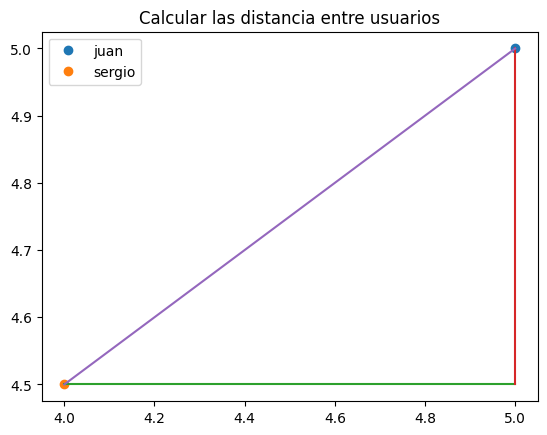

In [ ]:
# 1°) Para cacular esta 2 Dimensiones para graficar un plano cartesiano para entender --->

import matplotlib.pyplot as plt

#Para dibujar el plano Cartesiano con los Puntos:
plt.plot(5,5,"o") # "o"= para que coloque el punto.
plt.plot(4,4.5,"o")
plt.legend(["juan", "sergio"])
plt.title("Calcular las distancia entre usuarios")

#Para dibujar el triangulo rectangulo que forman los puntos:
plt.plot([4,5], [4.5, 4.5], linestyle="-")
plt.plot([5,5], [4.5, 5], linestyle="-")
plt.plot([4,5], [4.5, 5], linestyle="-")

# Usaremos Pitagoras.

In [ ]:
# 2°) Vamos hacer el calculo para saber la distancia sabiendo los puntos --->

import numpy as np

# juan = [5,5] , al ser listas de puntos no se pueden realizar operaciones entre listas, entonces importamos Numpy para crear Array.
# sergio = [4, 4.5]

juan = np.array([5,5])
sergio = np.array([4, 4.5])

juan - sergio

# Nos devuelve la distancia entre los puntos de los Catetos.

array([1. , 0.5])

## **DISTANCIA PARA VERIAS DIMENSIONES**.

Ya tenemos la diferencia entre Juan - Sergio, la diferencia de los Catetos del triangulo x = 1, y = 0.5. Ahora para calcular la Distancia podemos usar la Hipotenusa al cuadrado es = a la suma de los catetos al cuadrado.

In [ ]:
# 3°) Para esto vamos a construir una Funcion --->

from math import sqrt # Para calcular la raiz cuadrada.

def pitagoras(a,b): # recibe los puntos de Juan y Sergio (a,b)
  (delta_x, delta_y) = a - b # delta_x, delta_y= diferencia de los puntos (array([1. , 0.5]))
  return sqrt(delta_x*delta_x + delta_y*delta_y) # 1*1 + 0.5*0.5= 1.25(hacemos la raiz)= 1.1180

In [ ]:
# 4°) Hacemos la prueba con la Funcion creada --->

pitagoras(juan, sergio)

# Nos devuelve que la distancia entre esos 2 puntos es de 1.118(hipotenusa)

1.118033988749895

Que pasa si Juan y Sergio miran una nueva pelicula, 3 peliculas, y le dan una nueva nota?, ya NO podemos usar Pitagoras y calcular la distancia de 2 puntos a traves de la Hipotenusa, ya que NO nos funciona para una Vector de 3, 4, 5, etc Dimensiones, para esto usaremos una Funcion NUMPY.

In [ ]:
# 5°) Usamos la Funcion de NUMPY LINALG y la normalizacion de la diferencia de nuestros VECTORES(NORM), calcula la diferencia de esos
# 2 Vectores y los va a Normalizar --->

np.linalg.norm(juan - sergio)

1.118033988749895

In [ ]:
# 6°) Redifinimos la Funcion Pitagoras por Distancia --->

def distancia(a,b):
  return np.linalg.norm(a-b)

distancia(juan, sergio)

# Esta Funcion nos sirve para calcular diferentes DIMENSIONES!

1.118033988749895

Text(0.5, 1.0, 'Calcular las distancia entre usuarios')

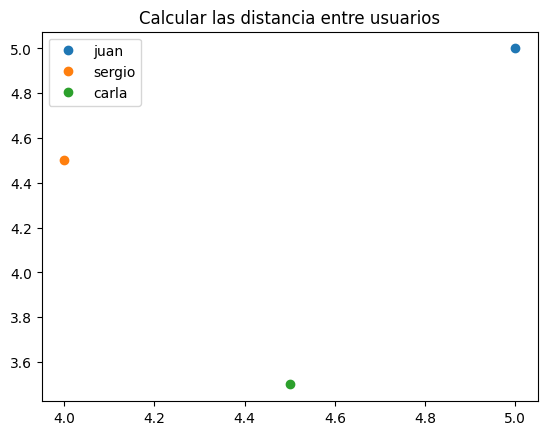

In [ ]:
# 7°) Adicionamos un nuevo punto al plano Cartesiano --->

plt.plot(5,5,"o") # "o"= para que coloque el punto.
plt.plot(4,4.5,"o")
plt.plot(4.5, 3.5, "o") # Sumamos otro Usuario
plt.legend(["juan", "sergio", "carla"])
plt.title("Calcular las distancia entre usuarios")

# Nos devuelve en el plano Cartesiano el punto nuevo de Carla y podemos ver que Sergio esta mas proximo de Carla que juan de Carla.

In [ ]:
# 8°) Ahora usamos la Funcion Distancia para verificar la distancia de los 3 --->

juan = np.array([5,5])
sergio = np.array([4, 4.5])
carla = np.array([4.5, 3.5])

print(distancia(juan, sergio))
print(distancia(sergio, carla))
print(distancia(juan, carla))

# Los primeros 2 tiene iguales Distancia.

1.118033988749895
1.118033988749895
1.5811388300841898


In [ ]:
# 9°) Imaginemos que los 3 vieron una nueva pelicula y le dieron una nota --->

juan = np.array([5,5, 4.5])
sergio = np.array([4, 4.5, 5])
carla = np.array([4.5, 3.5, 5])

print(distancia(juan, sergio))
print(distancia(sergio, carla))
print(distancia(juan, carla))

# Nos devuleve que los mas proximos segun los puntos(notas) son print(distancia(sergio, carla))

1.224744871391589
1.118033988749895
1.6583123951777


La funcion DISTANCIA usando NUMPY ahora nos permite calcular la distancia, independientemente de la Dimension de nuestros Vectores, de la cantidad de peliculas que los usuarios han visto.

**Emjemplo:**

***Distancia euclidiana entre inmuebles***

Carolina trabaja en una empresa inmobiliaria y está realizando un análisis para calcular la distancia entre departamentos y casas que tiene a la venta en un determinado barrio. Para su análisis está usando Python y ya construyó los arrays Nunpy con la ubicación de los inmuebles:

In [ ]:
import numpy as np

departamento1132 = np.array([1,4])
departamento2859 = np.array([3,4.5])
casa5687 = np.array([3,4.5])
casa6295 = np.array([5,2.5])

Ahora para calcular la distancia entre los inmuebles, Carolina necesita implementar una función Pitagoras que realize este cálculo.

***¿Cual de las alternativas tiene la función Pitágoras que podría ayudar a Carolina con su desafio?***

In [ ]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)

In [ ]:
print(pitagoras(departamento1132,departamento2859))
print(pitagoras(casa5687,casa6295))

2.0615528128088303
2.8284271247461903


Esta función está recibiendo dos arrays Numpy como parámetro de entrada, calcula el delta_x y delta_y con la diferencia de los dos vectores, y luego devuelve la raíz cuadrada de la suma de los cuadrados de los delta's.

## **GENERALIZANDO EL CALCULO DE DISTANCIAS**.

Ya habiamos realizado el calculo de Distancia entre los usuarios, ahora debemos hacer que la Funcion del calculo de distancia funcione para el dataset de las peliculas y asi recomendar peliculas en funcion de la SIMILARIDAD entre los usuarios.

In [ ]:
# 1°) Vamos a entender o recordar como era nuestro dataset de notas --->
3
notas.head()

# Cada linea significa una nota dada por un usuario para una pelicula especifica.

,usuarioId,peliculasId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# 2°) Vamos= a filtrar USUARIO 1 y USUARIO 4 --->

# USUARIO 1:
notas.query("usuarioId == 1")

# Nos devuelve que hay 232 Filas del USUARIO 1 de ID = 1 y nos dice que evaluo 232 peliculas con sus respectivas Notas.

,usuarioId,peliculasId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [ ]:
# USUARIO 4:
notas.query("usuarioId == 4")

# Evalua 216 peliculas con sus respectivas Notas.

,usuarioId,peliculasId,nota,momento
300,4,21,3.0,986935199
301,4,32,2.0,945173447
302,4,45,3.0,986935047
303,4,47,2.0,945173425
304,4,52,3.0,964622786
...,...,...,...,...
511,4,4765,5.0,1007569445
512,4,4881,3.0,1007569445
513,4,4896,4.0,1007574532
514,4,4902,4.0,1007569465


In [ ]:
# 3°) Para calcular las DISTANCIAS necesitamos las Notas de uno versus las notas del otro, lo que vamos hacer entonces es almacenar
# estas consultas en 2 VARIABLES del USUARIO 1 Y 4 , queremos ademas solamente columnas de PELICULASID y la NOTA --->

usuario1 = notas.query("usuarioId == 1")[["peliculasId", "nota"]].set_index("peliculasId") # set_index("peliculasId")=para que el Indice del dataset sea peliculasId.
usuario4 = notas.query("usuarioId == 4")[["peliculasId", "nota"]].set_index("peliculasId")

In [ ]:
# 4°) Ahora calculamos la DISTANCIA entre estos 2 usuarios, pero hay muchas peliculas que el USUARIO 1 y el USUARIO 4 NO vio y viceversa pero
# alguna peliculas si vieron los 2. Para calcular las Distancias yo necesito comparar exectamente las mismas peliculas, donde el ID de peliculas
# es igual entre los 2, para esto tenemos que juntar los 2 conjuntos de datos y ver cuales son iguales a traves de un JOIN ---->

usuario1.join(usuario4, lsuffix="_izq", rsuffix="_der") # lsuffix,rsuffix= para que junte por columna de peliculasId y no nos de error, separando las notas de c/u.

# Nos devuelve las peliculasId con la columna del USUARIO1 en la izquierda y las notas del USUARIO4 a la derecha, los que estan como NAN son todas
# las notas que el USUARIO1 dio pero que esas peliculas NO fue evaluada por el USUARIO 4.


,nota_izq,nota_der
peliculasId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


In [ ]:
# 5°) Solo queremos las peliculas y notas que vieron los 2 Usuarios, para esto hacemos un DROPNA() para borrar las notas NAN --->

diferencias = usuario1.join(usuario4, lsuffix="_izq", rsuffix="_der").dropna()

# Nos devuelve solo las peliculas que vieron los 2 USUARIOS y que los 2 dieron las NOTAS.

In [ ]:
# 6°) Ahora llamamos a la variable DIFERENCIAS y calculamos la DISTANCIA con la Funcion que habiamos creado con anterioridad --->

distancia(diferencias["nota_izq"], diferencias["nota_der"])

# Tenemos que la DISTANCIA entre el USUARIO1 y el USUARIO4 ES DE 11.13, ya tenemos una pequeña generalizacion y de esta manera ya estamos
# usando los conjuntos de datos de nuestro dataset para 2 usuarios.

11.135528725660043

## **CREANDO FUNCIONES PARA EL CALCULO DE DISTANCIAS**.

Ya calculamos la Distancia entre 2 usurios especificos de nuestro dataset, ahora lo que haremos es generalizar el proceso, vamos a tomar 2 Usuarios cualquiera de nuestro dataset y que calcule la Distancia.

In [ ]:
# 1°)Vamos a dividir el codigo que habiamos realizado en 2 partes, por un lado vamos a identificar las NOTAS de un usuario especifico
# y para generalizar lo que necesitamos es crear Funciones ---->

def notas_del_usuario(usuarioId): # recibe como parametro un usuario ID.
  notas_del_usuario = notas.query("usuarioId == %d" % usuarioId)[["peliculasId", "nota"]] # Recibe un usuario ID y va a calcular con QUERY de ese usuario.
  notas_del_usuario = notas_del_usuario.set_index("peliculasId")
  return notas_del_usuario

In [ ]:
# 2°) Probamos la Funcion que creamos --->

notas_del_usuario(1)

# Nos devuelve todas las notas del usuario 1, funciona para cualquier usuario 2,4,5

,nota
peliculasId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
notas_del_usuario(5)

,nota
peliculasId,
1,4.0
21,4.0
34,4.0
36,4.0
39,3.0
50,4.0
58,5.0
110,4.0
150,3.0


In [ ]:
# 3°) Calculamos las Diferencias dados 2 usuarios y creamos la Funcion de Distancias entre usuarios ---->

# Antes camabiamos el nombre de la Funcion que calcula la DISTANCIA entre 2 VECTORES, para que quede mas ordenado:
def diferencia_de_vectores(a,b):
  return np.linalg.norm(a-b)

def distancia_entre_usuarios(usuario_id1, usuario_id2): #Recibe 2 usuarios cualquiera.
  #notas de los 2 usuarios:
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix = "_izq", rsuffix = "_der").dropna() # diferencias = utilizamos Variable ya creada.
  return diferencia_de_vectores(diferencias["nota_izq"], diferencias["nota_der"])


In [ ]:
# 4°) Probamos la Funcion de Distancia entre usuarios ---->

distancia_entre_usuarios(1,4)

# No devuelve mismo valor que anteriormente, pero a traves de estas funciones puedo calcular la Distancia entre cualquier usuario.

11.135528725660043

In [ ]:
# Comparamos distancia de varios Usuarios con el Usuario 1 ---->

print(distancia_entre_usuarios(1,2))
print(distancia_entre_usuarios(1,4))
print(distancia_entre_usuarios(1,5))
print(distancia_entre_usuarios(1,6))

# Podemos ver que el Usuario 6 (8.60) esta mas proximo al Usuario 1 que el Usuario 4(11.13).

1.4142135623730951
11.135528725660043
3.7416573867739413
8.602325267042627


**Definicion:**

***Comparativo de ventas entre regiones***

Pedro está haciendo un análisis de ventas para identificar en qué región de la ciudad se vende más, si en la región norte o en la región sur.

Usando Python y Pandas ya creó sus dataframes donde separó en dos conjuntos de datos las ventas de la región norte y las ventas de la región sur.

Para verificar los primeros 5 valores de los dos dataframes usamos la función head() ----> ventas_region_norte.head(), ventas_region_sur.head().

Ahora para comparar necesita hacer un join de los dos conjuntos de datos, para su análisis sólo tiene sentido comparar los mismos productos, o sea aquellos que se vendieron tanto en la región norte como en la región sur.

***¿Cual de las alternativas crea el conjunto de datos ventas_regiones con la sentencia join correcta y que soluciona el problema de Pedro?***:

* ventas_ regiones = ventas_region_norte.join(ventas_region_sur,
  lsuffix='_norte', rsuffix='_sur').dropna(), la función join nos permite unir las columnas de dos dataframes que comparten el mismo índice. Usamos los sufijos para diferenciar las columnas que tienen el mismo nombre, y con dropna() nos cercioramos de mantener únicamente los registros que están presentes en los dos dataframes.

* ventas_ regiones = ventas_region_norte.join(ventas_region_sur).dropna(), Esta sentencia nos retorna un error indicando que hay columnas con el mismo nombre y nos sugiere utilizar sufijos con lsuffix y rsuffix.  



## **<font color=red>USUARIOS MAS PROXIMOS**

## **CALCULANDO LAS DISTANCIA DE TODOS**.

Ahora veremos la Distancia entre el Usuario 1 y el resto, como es la Distancia del el con el resto de los usuarios del dataset.

In [ ]:
# 1°) Primero debemos saber cuantos usuarios unicos tenemos en la base --->

notas["usuarioId"].unique()

# Nos devuelve 610 Usuarios.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# 2°) Como podemos comparar 1 Usuario de Refencia con el resto de los usuarios??, podemos crear un BUCLE, CICLO, un FOR para
# rodar, ejecutar y pasar por toda la lista de usuarios e ir comparanod y calculando la DISTANCIA de 1 con el 2, 1 con el 3,
# 1 con el 4, y asi sucesivamente ---->

# Antes debemos modificar la Funcion de DISTANCIA_ENTRE_USUARIOS para que nos devuelva 3 valores:
def distancia_entre_usuarios(usuario_id1, usuario_id2): #Recibe 2 usuarios cualquiera.
  #notas de los 2 usuarios:
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix = "_izq", rsuffix = "_der").dropna() # diferencias = utilizamos Variable ya creada.
  distancia = diferencia_de_vectores(diferencias["nota_izq"], diferencias["nota_der"]) # Cambiamos nombre de diferencia por DISTANCIA.
  return [usuario_id1, usuario_id2, distancia] # Para que nos devuelve 3 valores.


usuarios = notas["usuarioId"].unique() # usuarios son todas las columnas de ususraioid.unique()
usuario_ref = 1 # Variable usuario de referencia y pondemos el que queremos en este caso el 1
for usuario in usuarios:
  informaciones = distancia_entre_usuarios(usuario_ref, usuario) # Le pasamos el usuario de referencia 1 y el usuario in usuarios
  print(informaciones)


# Nos devuelve una lista de lista con las comparaciones del usuario 1 con los 609 restante y su respectiva distancia, de esta forma
# podemos ver cual es el que esta mas proximo al usuario de referencia 1.

[1, 1, 0.0]
[1, 2, 1.4142135623730951]
[1, 3, 8.200609733428363]
[1, 4, 11.135528725660043]
[1, 5, 3.7416573867739413]
[1, 6, 8.602325267042627]
[1, 7, 7.106335201775948]
[1, 8, 3.7416573867739413]
[1, 9, 1.0]
[1, 10, 7.858116822750856]
[1, 11, 4.242640687119285]
[1, 12, 0.7071067811865476]
[1, 13, 1.4142135623730951]
[1, 14, 5.0]
[1, 15, 5.852349955359813]
[1, 16, 7.22841614740048]
[1, 17, 4.6097722286464435]
[1, 18, 8.426149773176359]
[1, 19, 17.60681686165901]
[1, 20, 6.48074069840786]
[1, 21, 9.096702699330127]
[1, 22, 5.244044240850758]
[1, 23, 5.408326913195984]
[1, 24, 4.415880433163924]
[1, 25, 1.4142135623730951]
[1, 26, 2.23606797749979]
[1, 27, 9.219544457292887]
[1, 28, 14.882876066137216]
[1, 29, 4.55521678957215]
[1, 30, 1.8027756377319946]
[1, 31, 4.58257569495584]
[1, 32, 5.196152422706632]
[1, 33, 5.916079783099616]
[1, 34, 6.363961030678928]
[1, 35, 2.23606797749979]
[1, 36, 6.519202405202649]
[1, 37, 4.0]
[1, 38, 5.5677643628300215]
[1, 39, 11.090536506409418]
[1, 40

In [ ]:
# 3°) Para generalizar mas todo esto vamos a construir una Funcion --->

def distancia_de_todos(usuario_ref): # Le pasamoscualquier usuario de referncia
  usuarios = notas["usuarioId"].unique() # Calcula los usuarios unicos con sus notas.
  distancias = [] # Creamos una lista vacia.
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones) # para colocar las informaciones en la lista vacia.
  return distancias


In [ ]:
# 4°) Probamos la Funcion --->

distancia_de_todos(1)[:5] # Usuario 1 con respecto al resto, que nos muestre los primeros 5.

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [ ]:
# 5°) Nos retorna una Lista y para trabajar es mejor hacerlo con un DataFrame, lo agregamos a la funcion --->

def distancia_de_todos(usuario_ref):
  usuarios = notas["usuarioId"].unique()
  distancias = []
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
  distancias = pd.DataFrame(distancias, columns = ["usuario_ref", "usuario", "distancia"])
  return distancias


distancia_de_todos(1).head(10) # Podemos cambiar (1) por cualquier numero de usuario y comparar.

# Podemos ver los primeros 10 usuarios con las distancias en relacion del usuario de refencia 1, y el mas proximo es el usuario 9 = 1.000000.

,usuario_ref,usuario,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


**Definicion:**

**Ayuda con la función Unique**

Ana es practicante en una empresa de Data Science y está realizando la revisión del código del sistema de recomendación de un cliente. Durante el proceso de revisión encontró una función que no conoce y no sabe lo que realiza, la función es unique().

***¿Si tuvieras que ayudar a Ana cuál de las respuestas le recomendarías?***

* **La función unique()** forma parte de la biblioteca de Pandas y lo que hace es retornar los valores únicos de una lista, tupla o dataframe.
Con la función unique() podemos eliminar los valores repetidos que están contenidos en una lista o dataframe y quedarnos únicamente con los valores únicos.

## **REFINANDO EL CALCULO DE DISTANCIA**.

Tenemos el calculo de la DISTANCIA de usuario de referencia con respecto al resto de los usuarios, y esa distancia varia, representa la semejanza o SIMILARIDAD que hay entre el resto de los usuarios. Pretendemos buscar los usuarios que son mas proximos, mas parecidos de nuestro usuario de Referencia y recomendarle las peliculas que ese otro usuario ha visto y que el usuario de referncia todavia NO ha visto.

In [ ]:
# 1°) Para esto vamos a ordenar la Distancia de mayor a menor para ver la distancia que tienen los usuarios con el usuario de
# Referencia --->

distancia_de_todos(1).sort_values("distancia").head(20)

# Podemos ver que tenemos unos 11 usuarios y que la distancia es 0 con el usuario de refencia, podemos pensar que ese usuario(578)
# vio las mismas peliculas que el usuario 1 ?????????????????

,usuario_ref,usuario,distancia
0,1,1,0.000000
577,1,578,0.000000
76,1,77,0.000000
84,1,85,0.000000
174,1,175,0.000000
555,1,556,0.000000
252,1,253,0.000000
290,1,291,0.000000
305,1,306,0.000000
495,1,496,0.000000


In [ ]:
# 2°) Vamos a verificar si dieron las mismas Notas, comparamos usuario 1 y 578 a traves de un JOIN --->

notas_del_usuario(1).join(notas_del_usuario(578), lsuffix = "_izq", rsuffix = "_der").dropna()

# Nos devuelve vacio, NO hay notas de peliculas que seran interseccion entre los 2 conuntos de datos, entre estos 2 usuarios, todas
# las peliculas que el usuario 1 son totalmente difrenet al que el usuario 578 vio, por eso es que le Distancia nos da 0, NO puede
# calcular la Distancia de algo que NO existen puntos en comun.

,nota_izq,nota_der
peliculasId,,


In [ ]:
# 3°) Verificamos con el usuario 77 para ver si lo que ocurre es igual al usuario 578 --->

notas_del_usuario(1).join(notas_del_usuario(77), lsuffix = "_izq", rsuffix = "_der").dropna()

# Tenemos 6 peliculas que usuario 1 evaluo y que el ususario 77 evaluo y podemos ver que en ambos casos los 2 dieron NOTA 5,
# aca podemos concluir que el ususario 1 es SIMILAR al usuario 77.

,nota_izq,nota_der
peliculasId,,
260,5.0,5.0
1196,5.0,5.0
1198,5.0,5.0
1210,5.0,5.0
2571,5.0,5.0
3578,5.0,5.0


In [ ]:
# Compramos con el usuario 85 --->

notas_del_usuario(1).join(notas_del_usuario(85), lsuffix = "_izq", rsuffix = "_der").dropna()

# Nos devuelve 1 sola pelicula, una sola interseccion en comun entre el usuario 1 y 85 y ambos evaluaron con NOTA 5.

,nota_izq,nota_der
peliculasId,,
527,5.0,5.0


***Todo esto nos muestra que es necesario refinar un poco nuestro codigo, considerar aquellos usuarios que tienen mas de un MINIMO de peliculas vistas y NO considerar las peliculas que no tiene en nada en comun con algun usuario :***

In [ ]:
# 4°) Para esto vamos a alterar la Funcion Distancia entre Usuarios ---->

def distancia_entre_usuarios(usuario_id1, usuario_id2, minimo = 5): # Minimo 5 peliculas en comun.
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix = "_izq", rsuffix = "_der").dropna()
  if len(diferencias) < minimo: # Agregamos un IF, si el largo de la diferencia es menor al Minimo(5),
    return [usuario_id1, usuario_id2, 1000] # Que nos devuelve el valor de 1000 a los usuario que no tengas pelicualas en comun.

  distancia = diferencia_de_vectores(diferencias["nota_izq"], diferencias["nota_der"])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
# 5°) Colocamos la funcion Distancia de todos, para que quede todo mas ordenado --->


def distancia_de_todos(usuario_ref):
  usuarios = notas["usuarioId"].unique()
  distancias = []
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
  distancias = pd.DataFrame(distancias, columns = ["usuario_ref", "usuario", "distancia"])
  return distancias


In [ ]:
# 6°) Ahora probamos nuevamente la funcion Distancia de todos --->

distancia_de_todos(1).sort_values("distancia").head(10)

# Ya tenemos los valores mas proximos con un MINIMO de 5 peliculas en comun entre nuestro usuario de Referencia, y el usuario con el
# cual lo estamos comparando, ya vimos que el 77 es un usuario que tiene peliculas en comun y notas de evaluacion de esas peliculas son
# igual al USUARIO 1 es el mas parecido y por eso esa Distancia es de 0.

,usuario_ref,usuario,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
48,1,49,1.000000
8,1,9,1.000000
257,1,258,1.000000
318,1,319,1.118034
397,1,398,1.224745


**Definicion:**

Valor mínimo para el cálculo de distancias

***¿Por qué es importante colocar un valor mínimo de películas en común como parámetro de nuestra función para calcular la distancia entre usuarios?***

* Porque para realizar recomendaciones de películas nos basamos en los usuarios próximos, en este caso con gustos de películas en común. Para cerciorarnos de encontrar usuarios próximos debemos considerar aquellos usuarios que tienen en común un número mínimo de películas con nuestro usuario de referencia o comparación. Colocamos un valor mínimo de películas en común para que los usuarios próximos de verdad sean lo más próximo posible de nuestro usuario de referencia.

## **<font color=red>GENERANDO RECOMENDACIONES CON KNN**

## **IDENTIFICANDO EL USUARIO MAS PROXIMO**.

Ya calculamos los USUARIOS mas proximos usando la funcion que creamos de distancia de todos. Esto lo hicimos para ver cual es el usuario mas proximo al USUARIO de REFERENCIA, ver que pelicula el usuario vio y recomendar esas peliculas de usuario de referencia que NO ha visto aun.

In [ ]:
# 1°) Vamos a utilizar al codigo(distancia_de_todos(1).sort_values("distancia") y lo vamos a encapsular en una funcion nueva de los mas proximos del usuario de referencia --->

def mas_proximos_usuario_ref(usuario_ref):
  mas_proximos = distancia_de_todos(usuario_ref) # Le pasamos usuario de referencia
  mas_proximos = mas_proximos.sort_values("distancia") # y los ordenamos
  return mas_proximos

mas_proximos_usuario_ref(1)

# Misma lista que ya tenemos pero encapsulada de la funcion.

,usuario_ref,usuario,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
...,...,...,...
189,1,190,1000.000000
59,1,60,1000.000000
575,1,576,1000.000000
544,1,545,1000.000000


In [ ]:
# 2°) Eliminamos el usuario de referencia comparado con el mismo, no tiene sentido que nos muestre y para poder eliminar
# vamos a configurar el set index --->

def mas_proximos_usuario_ref(usuario_ref):
  mas_proximos = distancia_de_todos(usuario_ref) # Le pasamos usuario de referencia
  mas_proximos = mas_proximos.sort_values("distancia") # y los ordenamos
  mas_proximos = mas_proximos.set_index("usuario") # Lo hacemos en la columna de usuario el set_index.
  mas_proximos = mas_proximos.drop(usuario_ref) # Borramos con drop en usuario_ref que repite.
  return mas_proximos

mas_proximos_usuario_ref(1)

# Nos devuelve el Indice configurado para que sea USUARIO para que compare los usuarios con el 1(refencia), y ordenado en relacion
# de la distancia 77, mas proximo.

,usuario_ref,distancia
usuario,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,1000.000000
60,1,1000.000000
576,1,1000.000000


In [ ]:
# 3°) Hacemos otro ajuste en nuestra funcion porque esta demorando bastante cuando hacemos esas pruebas y para esto vamos a colocar
# un limitador, limite de usuarios, ejemplo hasta el usuario de 50 o 100, tambien debemos ajustar 50 a 100, ajustamos funciones
# anterior --->

def distancia_de_todos(usuario_ref, numero_usuario_analizar = None):
  usuarios = notas["usuarioId"].unique()
  distancias = []
  if numero_usuario_analizar: # Agregamos el condicional para especificar el parametro del numero de usurios a analizar, luego especificamos en mas_proximos_usuario_ref
    usuarios = usuarios[:numero_usuario_analizar]
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
  distancias = pd.DataFrame(distancias, columns = ["usuario_ref", "usuario", "distancia"])
  return distancias

In [ ]:
# Lo hacemos lo mismo en la funcion MAS_PROXIMOS_USUARIOS_REF y tambien le pasamos el parametro numero_usuario_analizar tambien---->

def mas_proximos_usuario_ref(usuario_ref, numero_usuario_analizar = None):
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar) # Le pasamos usuario de referencia y numero_usuario_analizar
  mas_proximos = mas_proximos.sort_values("distancia") # y los ordenamos
  mas_proximos = mas_proximos.set_index("usuario") # Lo hacemos en la columna de usuario el set_index.
  mas_proximos = mas_proximos.drop(usuario_ref) # Borramos con drop en usuario_ref que repite.
  return mas_proximos

mas_proximos_usuario_ref(1, 100) # Los 100 proximos.

# Nos compara el 1 con los primeros 100 valores.

,usuario_ref,distancia
usuario,,
77,1,0.000000
49,1,1.000000
9,1,1.000000
65,1,1.322876
90,1,1.414214
...,...,...
87,1,1000.000000
53,1,1000.000000
12,1,1000.000000


In [ ]:
# 4°) Como nos devuelve usuarios con mas de 1000.00000 que eran los que estan mas distantes y nosotros le asiganamos ese valor para diferenciarlos
# de los mas proximos debemos eliminarlos porque no nos sirve , hacemos el ajuste en la funcion de DISTANCIA ENTRE USURIOS que es la funcion que
# calcula la distancia entre usuarios y que luego utiliza distancia_de_todos y volvemos a colocar las funciones en orden para ejecutar --->

def distancia_entre_usuarios(usuario_id1, usuario_id2, minimo = 5): # Minimo 5 peliculas en comun.
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix = "_izq", rsuffix = "_der").dropna()
  if len(diferencias) < minimo:
    return None # para que nos retorne NAN si la diferencia en menor al minimo, y asi utilizarla en la funcion distancia de todos.
  distancia = diferencia_de_vectores(diferencias["nota_izq"], diferencias["nota_der"])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(usuario_ref, numero_usuario_analizar = None):
  usuarios = notas["usuarioId"].unique()
  distancias = []
  if numero_usuario_analizar:
    usuarios = usuarios[:numero_usuario_analizar]
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
    distancias = list(filter(None, distancias)) # Hacemos un FILTRO en la lista y eliminamos los valores NAN en distancias.
  distancias = pd.DataFrame(distancias, columns = ["usuario_ref", "usuario", "distancia"])
  return distancias

In [ ]:
def mas_proximos_usuario_ref(usuario_ref, numero_usuario_analizar = None):
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar) # Le pasamos usuario de referencia y numero_usuario_analizar
  mas_proximos = mas_proximos.sort_values("distancia") # y los ordenamos
  mas_proximos = mas_proximos.set_index("usuario") # Lo hacemos en la columna de usuario el set_index.
  mas_proximos = mas_proximos.drop(usuario_ref) # Borramos con drop en usuario_ref que repite.
  return mas_proximos

mas_proximos_usuario_ref(1,100)

,usuario_ref,distancia
usuario,,
77,1,0.000000
9,1,1.000000
49,1,1.000000
65,1,1.322876
90,1,1.414214
...,...,...
57,1,13.190906
91,1,13.518506
28,1,14.882876


In [ ]:
# 5°) Guardamos en una Variable, mas_proximos_usuario_ref(1,100) --->

similares = mas_proximos_usuario_ref(1,100).head()
similar = similares.iloc[0] # Al estar ordenado me trae el mas proximo posicion 0.
similar

# Nos devuelve los primeros 5 mas proximos, siendo el usuario 77 mas proximo.

,77
usuario_ref,1.0
distancia,0.0


## **RECOMENDANDO LAS PELICULAS DEL MAS PROXIMO**.

Ya identificamos cual era el USUARIO mas SIMILAR al usuario de REFERENCIA y nos retorno el 77. Lo que necesitamos saber ahora que peliculas mira este usuario y comprararlas con el USUARIO 1 y eliminar los duplicados para NO recomendar las peliculas que el usuario 1 ya vio pero sugerrirle las que NO vio.

In [ ]:
# 1°) Vamos a consultar cuales son las NOTAS de ese USUARIO SIMILAR 77 con la funcion notas del usuario --->

similares = mas_proximos_usuario_ref(1,100).head()
similar = similares.iloc[0].name
notas_del_usuario(similar) # Funcion y pasamos similar que son los usuarios mas proximos a 1

# Notas del usuario 77 de las peliculas dentro de las 100.

,nota
peliculasId,
260,5.0
1196,5.0
1198,5.0
1210,5.0
2571,5.0
3578,5.0
3948,3.0
3996,5.0
4226,2.5


In [ ]:
# 2°) Vemos las notas del usuario de Referencia(1) --->

notas_del_usuario(1)

,nota
peliculasId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
# 3°) Capturamos los 2 USUARIOS y eliminamos los repetidos usando DROP --->

usuario_ref = 1

notas_usuario_ref = notas_del_usuario(usuario_ref)
similares = mas_proximos_usuario_ref(usuario_ref,100)
similar = similares.iloc[0].name
notas_del_usuario(similar)

notas_del_similar = notas_del_usuario(similar)
notas_del_similar = notas_del_similar.drop(notas_usuario_ref.index, errors = "ignore") # index=que borre por el indice los similares entre 1 y 77.

notas_del_similar

# Nos muestra unicamente las notas que son diferentes entre la nota del similar(77) y las notas del usuario referencia(1)

,nota
peliculasId,
3948,3.0
3996,5.0
4226,2.5
4878,1.0
4973,2.5
4993,5.0
5349,5.0
5378,5.0
5418,2.5


In [ ]:
# 4°) Ordenamos de mayor a menor las NOTAS porque necesitamos las notas altas para recomendar --->

notas_del_similar.sort_values("nota", ascending=False)

# Ordenamos de mayor a menor las notas.

,nota
peliculasId,
8636,5.0
58559,5.0
33794,5.0
4993,5.0
5349,5.0
5378,5.0
8961,5.0
5816,5.0
5952,5.0


In [ ]:
# 5°) Generalizamos todo el codigo en una Funcion, para poder reutilizar inclusive con otros usuarios, creamos la Funcion --->

def sugerencias(usuario_ref, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = mas_proximos_usuario_ref(usuario_ref, numero_usuario_analizar)
  similar = similares.iloc[0].name

  notas_del_similar = notas_del_usuario(similar)
  notas_del_similar = notas_del_similar.drop(notas_usuario_ref.index, errors = "ignore")
  recomendaciones = notas_del_similar.sort_values("nota", ascending=False)

  return recomendaciones

In [ ]:
# 6°) Probamos la Funcion --->

sugerencias(1,100).head(10)

# Nos devuelve las notas ordenadas de mayor a menor y son todas las peliculas que le vamos a recomendar a nuestro usuario
# podemos recomendar los 10 primeras.

,nota
peliculasId,
8636,5.0
58559,5.0
33794,5.0
4993,5.0
5349,5.0
5378,5.0
8961,5.0
5816,5.0
5952,5.0


In [ ]:
# 7°) Para saber que peliculas son --->

def sugerencias(usuario_ref, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = mas_proximos_usuario_ref(usuario_ref, numero_usuario_analizar)
  similar = similares.iloc[0].name

  notas_del_similar = notas_del_usuario(similar)
  notas_del_similar = notas_del_similar.drop(notas_usuario_ref.index, errors = "ignore")
  recomendaciones = notas_del_similar.sort_values("nota", ascending=False)

  return recomendaciones.join(peliculas) # Unimos las recomendacion con el nombre de la columna de peliculas.

sugerencias(1,100).head(10)

# Nos devuelve los nombres de las 10 peliculas(dataframe), las peliculas que el usuario 77 vio y que todavia el usuario 1 no vio.

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277


In [ ]:
# 8°) Podemos hacer los mismo con cualquier usuario --->

sugerencias(2,100).head(10)

# Nos devuelve las peliculas que le sugerimos o recomendamos al usuario 2 en funcion del mas proximo del usuario 2.

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
1213,5.0,Goodfellas (1990),Crime|Drama,126.0,4.250000
858,5.0,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
8957,5.0,Saw (2004),Horror|Mystery|Thriller,33.0,3.181818
1136,5.0,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,136.0,4.161765
34405,5.0,Serenity (2005),Action|Adventure|Sci-Fi,50.0,3.940000
2959,4.5,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1089,4.5,Reservoir Dogs (1992),Crime|Mystery|Thriller,131.0,4.202290
778,4.5,Trainspotting (1996),Comedy|Crime|Drama,102.0,4.039216
2318,4.5,Happiness (1998),Comedy|Drama,16.0,4.125000


In [ ]:
# 9°) Se puede hacer lo mismo para toda la base de datos, quitando el 100 y recomendamos las 10 primera --->

sugerencias(1).head(10)

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277


**Ejercicio**:

***Solucionando errores de eliminación***

Francisco trabaja como analista en el departamento financiero de una empresa. Le pidieron hacer ajustes en algunas informaciones. Para ello va a usar 2 bases, una de facturas y otras de facturas a eliminar. Necesita excluir todas aquellas facturas que son para eliminar en la base de facturas. Esas facturas a eliminar se tratan de productos de devolución.

Francisco ya construyó el siguiente código donde colocó los datos en 2 dataframes de Pandas y también ya alteró el índice de las bases para la columna “id”:



In [ ]:
import pandas as pd

facturas = pd.DataFrame([[1,250],[2,765],[3,932],[4,847],[5,175]], columns=['id','valor'])
facturas = facturas.set_index('id')

facturas_eliminar = pd.DataFrame([[1,250],[2,765],[6,437]], columns=['id','valor'])
facturas_eliminar = facturas_eliminar.set_index('id')

**Visualizando los datos:**

In [ ]:
facturas.head()

,valor
id,
1,250
2,765
3,932
4,847
5,175


In [ ]:
facturas_eliminar.head()

,valor
id,
1,250
2,765
6,437


**Luego para eliminar las facturas_eliminar dentro del dataframe factura usó la función drop de pandas:**

***facturas = facturas.drop(facturas_eliminar.index)***

Solo que esto le retorna el siguiente error KeyError: '[6] not found in axis'. Basicamente Pyhton le está comunicando que está intentando eliminar un registro que no existe.

**¿Cómo podrías ayudar a Francisco para superar esa dificultad con su código?**:

In [ ]:
# Fransisco podría adicionar el parámetro errors y pasar como valor "ignore" esto hará que no se considere el error de
# intentar eliminar algo que no existe --->

facturas = facturas.drop(facturas_eliminar.index, errors="ignore")
facturas

,valor
id,
3,932
4,847
5,175


## **SUGERENCIA EN FUNCION DE VARIOS USUARIOS**.

Ya tenemos SUGERENCIAS de PELICULAS basandose en el usuario mas proximo, de un conunto de usuarios buscamos el usuario mas prximo al usuario de referencia(1) y vemos que pelicula el usuario mas proximo que el vio y que el del de referencia NO vio y le segurimos esas peliculas.

Pero podemos generar un ERROR en el caso que el usuario de refrencia haya visto peliculas ANIME pero el mas proximo vio ANIME para tambien vio ANIME JAPONES que al usuario de referencia NO le gusta gustan, seria mas acertivo NO considerar 1 usuario mas proximos sino un conjunto de usuarios mas proximos.

In [ ]:
# 1°) Vamos a ajustar la FUNICION  de los usurios mas proximos, para que que devuelva los N USUARIOS MAS PROXIMOS, adicionamos
# este nuevo parametro ---->

def mas_proximos_usuario_ref(usuario_ref, n_mas_proximos, numero_usuario_analizar = None): # n_mas_proximos=cant de usuarios proximos.
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar) # Le pasamos usuario de referencia y numero_usuario_analizar=cant de registros a analizar
  mas_proximos = mas_proximos.sort_values("distancia") # y los ordenamos
  mas_proximos = mas_proximos.set_index("usuario") # Lo hacemos en la columna de usuario el set_index.
  mas_proximos = mas_proximos.drop(usuario_ref) # Borramos con drop en usuario_ref que repite.

  return mas_proximos.head(n_mas_proximos)

In [ ]:
mas_proximos_usuario_ref(1,10,100)

# Nos devuelve los 10 USUARIOS mas proximos, le podemos pasar 15,20 o la cantidad que querramos.

,usuario_ref,distancia
usuario,,
77,1,0.000000
9,1,1.000000
49,1,1.000000
65,1,1.322876
90,1,1.414214
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068


In [ ]:
# 2°) Ahora ajustamos la Funcion SUGERENCIAS para considerar los N_USUARIOS_PROXIMOS --->

# Definimos las Variables:
usuario_ref = 1
numero_usuario_analizar = 10 # Cantidad de usuarios que tomamos de todo el dataFrame.
n_mas_proximos = 10

notas_usuario_ref = notas_del_usuario(usuario_ref)
similares = mas_proximos_usuario_ref(usuario_ref, n_mas_proximos, numero_usuario_analizar)
usuarios_similares = similares.index # Creamos Variable y le pasamos el INDEX de similares que es el ID del usuario.
notas_similares = notas.set_index("usuarioId").loc[usuarios_similares] # Notas de los usuarios mas proximos.
notas_similares = notas_similares.groupby("peliculasId").mean()[["nota"]] # Agrupame por peliculaId las notas y calcula la Media de la notas
recomendaciones = notas_similares.drop(notas_usuario_ref.index, errors = "ignore") # Borramos peliculas que el usuario 1 ya vio y puden estar dentro de recomendaciones
recomendaciones = recomendaciones.sort_values("nota", ascending = False) # Ordenamos las recomendaciones.

recomendaciones.join(peliculas).head() # Para ver el nombre de las peliculas en las recomendaciones.

# Nos devuelve las 5 peliculas para recomendar.

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
1449,5.0,Waiting for Guffman (1996),Comedy,24.0,3.875000
1250,5.0,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,45.0,4.122222
930,5.0,Notorious (1946),Film-Noir|Romance|Thriller,20.0,4.250000
1046,5.0,Beautiful Thing (1996),Drama|Romance,4.0,4.500000
1077,5.0,Sleeper (1973),Comedy|Sci-Fi,28.0,3.750000


## **GENERALIZANDO LA RECOMENDACION PARA VARIOS USUARIOS**.

Ya tenemos nuestro codigo que recomienda las peliculas con la cantidad N de usuarios proximos(10) y en funcion de las notas de estos usuarios hemos considerado las peliculas que estan mejor evaluadas.

In [ ]:
# 1°) Construimos la FUNCION para utilizar cualquier parametro y poder reutilizarla en cualquier caso --->

def sugerencias(usuario_ref, n_mas_proximos = 10, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = mas_proximos_usuario_ref(usuario_ref, n_mas_proximos, numero_usuario_analizar)
  usuarios_similares = similares.index
  notas_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  notas_similares = notas_similares.groupby("peliculasId").mean()[["nota"]]
  recomendaciones = notas_similares.drop(notas_usuario_ref.index, errors = "ignore")
  recomendaciones = recomendaciones.sort_values("nota", ascending = False)

  return recomendaciones.join(peliculas).head()

sugerencias(1,10,100)

# Nos devuelve las peliculas recomendadas.

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
261,5.0,Little Women (1994),Drama,42.0,3.880952
95510,5.0,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,30.0,3.250000
93510,5.0,21 Jump Street (2012),Action|Comedy|Crime,26.0,3.865385
339,5.0,While You Were Sleeping (1995),Comedy|Romance,98.0,3.469388


**Definicion Aula:**

***Concepto de KNN***

En esta clase llegamos a aprender los conceptos básicos de cómo funciona el algoritmo KNN. Basado en lo que viste:

<font color=orage>  <font color=orage>El algoritmo KNN (K Nearest Neighbors) selecciona los k vecinos más próximos para después utilizar las informaciones de esos vecinos más próximos para algún fin.
Como vimos en clase el algoritmo KNN recibe un parámetro de la cantidad de usuarios más próximos a ser analizado, luego realiza una búsqueda de valores parecidos que se encuentran próximos.

## **<font color=red>REFINANDO EL ALGORITMO DE RECOMENDACION**

## **RECOMENDACIONES PARA UN NUEVO USUARIO**.

A lo largo del curso construimos un sistema de recomendacion que se basa es los K NEAREST NEIGHBORS, que es un algoritmo bastante usado (KNN), hacemos una clasificacion de los usuarios mas proximos que vieron peliculas, la funcion sugiere los vecinos mas proximos de los usuarios que tienen gustos similares.

In [ ]:
# 1°) Cambiamos el nombre de la funcion KNN ya que nos devuleve quienes son los mas proximos --->

def knn(usuario_ref, n_mas_proximos, numero_usuario_analizar = None):
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar)
  mas_proximos = mas_proximos.sort_values("distancia")
  mas_proximos = mas_proximos.set_index("usuario")
  mas_proximos = mas_proximos.drop(usuario_ref)

  return mas_proximos.head(n_mas_proximos)

In [ ]:
def sugerencias(usuario_ref, n_mas_proximos = 10, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = knn(usuario_ref, n_mas_proximos, numero_usuario_analizar)
  usuarios_similares = similares.index
  notas_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  notas_similares = notas_similares.groupby("peliculasId").mean()[["nota"]]
  recomendaciones = notas_similares.drop(notas_usuario_ref.index, errors = "ignore")
  recomendaciones = recomendaciones.sort_values("nota", ascending = False)

  return recomendaciones.join(peliculas)

sugerencias(2,10,50).head(10)

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
1722,5.0,Tomorrow Never Dies (1997),Action|Adventure|Thriller,45.0,3.066667
96821,5.0,"Perks of Being a Wallflower, The (2012)",Drama|Romance,20.0,3.825000
5872,5.0,Die Another Day (2002),Action|Adventure|Thriller,27.0,2.925926
953,5.0,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance,58.0,4.034483
122912,5.0,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,13.0,4.000000
7573,5.0,Never Say Never Again (1983),Action|Adventure|Thriller,8.0,3.125000
2021,5.0,Dune (1984),Adventure|Sci-Fi,37.0,3.432432
1952,5.0,Midnight Cowboy (1969),Drama,22.0,3.954545


In [ ]:
# 2°) Vamos a localizar una lista de peliculas que saco el profesor de la base de datos para identificar que peliculas son --->

peliculas.loc[[122904, 1246, 2529, 2324, 1, 7, 2, 1196, 260]] # loc=localizamos las peliculas.

# Nos devuelve los nombres de las peliculas que hemos seleccionado con ID.

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076


In [ ]:
# 3°) Creamos una Funcion que se va a llamar NUEVO_USUARIO va a recibir como parametro los datos de ese nuevo usuario --->

def nuevo_usuario(datos):
  usuario_id = notas["usuarioId"].max() + 1 # El usuario id nuevo va a ser el valor max de los usuariosid(610) + 1 = 611
  notas_usuario_nuevo = pd.DataFrame(datos, columns = ["peliculasId", "nota"]) # Las notas del nuevo usuario las colocamos en el dataframe.
  return notas_usuario_nuevo

In [ ]:
# 4°) Pasamos la funcion con los datos de la lista de las peliculas que selecciono el profesor y las notas que le dio el profesor a las peliculas --->

nuevo_usuario([[122904,2], [1246,5], [2529,2], [2324,5], [1,2], [7,0.5], [2,2], [1196, 1], [260,1]])

# Nos devuelve la peliculaId y la nota del nuevo usuario

,peliculasId,nota
0,122904,2.0
1,1246,5.0
2,2529,2.0
3,2324,5.0
4,1,2.0
5,7,0.5
6,2,2.0
7,1196,1.0
8,260,1.0


In [ ]:
# 5°) Ahora debemos adicionar la columna del usuario ID --->

def nuevo_usuario(datos):
  usuario_id = notas["usuarioId"].max() + 1
  notas_usuario_nuevo = pd.DataFrame(datos, columns = ["peliculasId", "nota"])
  notas_usuario_nuevo["usuarioId"] = usuario_id # Para agregar el id del usuario
  return notas_usuario_nuevo


#Para agregar el usuarioID=611
nuevo_usuario([[122904,2], [1246,5], [2529,2], [2324,5], [1,2], [7,0.5], [2,2], [1196, 1], [260,1]])

,peliculasId,nota,usuarioId
0,122904,2.0,611
1,1246,5.0,611
2,2529,2.0,611
3,2324,5.0,611
4,1,2.0,611
5,7,0.5,611
6,2,2.0,611
7,1196,1.0,611
8,260,1.0,611


In [ ]:
# 6°) Ahora Concatenamos con el dataset de notas --->

def nuevo_usuario(datos):
  usuario_id = notas["usuarioId"].max() + 1
  notas_usuario_nuevo = pd.DataFrame(datos, columns = ["peliculasId", "nota"])
  notas_usuario_nuevo["usuarioId"] = usuario_id
  return pd.concat([notas, notas_usuario_nuevo]) # Para concatenar al usuario nuevo con el dataset.


notas = nuevo_usuario([[122904,2], [1246,5], [2529,2], [2324,5], [1,2], [7,0.5], [2,2], [1196, 1], [260,1]]) # lo agregamos a una variable.
notas.tail() # TAIL= para identificar los ultimos elementos que sera el usuario 611.

,usuarioId,peliculasId,nota,momento
4,611,1,2.0,NaN
5,611,7,0.5,NaN
6,611,2,2.0,NaN
7,611,1196,1.0,NaN
8,611,260,1.0,NaN


In [ ]:
# 7°) Por ultimo llamamos a la funcion SUGERENCIAS, para ver las peliculas sugeridas al usuario 611 --->

sugerencias(611).head(10)

# Nos devuelve las 10 primeras peliculas sugeridas al usuario nuevo.

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
112852,5.0,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
932,5.0,"Affair to Remember, An (1957)",Drama|Romance,8.0,3.937500
93008,5.0,"Very Potter Sequel, A (2010)",Comedy|Musical,1.0,5.000000
955,5.0,Bringing Up Baby (1938),Comedy|Romance,18.0,3.861111
971,5.0,Cat on a Hot Tin Roof (1958),Drama,10.0,4.100000
45503,5.0,Peaceful Warrior (2006),Drama,1.0,5.000000
4708,5.0,Marat/Sade (1966),Drama|Musical,2.0,4.500000
1046,5.0,Beautiful Thing (1996),Drama|Romance,4.0,4.500000
49347,5.0,Fast Food Nation (2006),Drama,3.0,3.833333


## **FILTRANDO PELICULAS POPULARES**.

Vamos a decirle a nuestro algoritmo que utilice las peliculas de mas de 50 votos.

In [ ]:
# 1°) Vamos a recordar el dataset que ya habiamos construido con mas de 50 votos ---->

peliculas_con_mas_50_votos.head()

,titulo,generos,total_de_votos,media_votos
peliculasId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185


In [ ]:
# 2°) Ahora tenemos que pasarle el INDEX de PELICULASID para poder filtrar en nuestro dataset de notas, aquellas notas que
# pertenecen a las peliculas con mas de 50 votos, Filtramos el dataset notas, localizando las peliculas con mas de 50 votos,
# filtrandolo por el Index: --->

#notas = notas.reset_index() # Debemos resetear el Index de nuestro conjunto de datos notas
notas = notas.set_index("peliculasId").loc[peliculas_con_mas_50_votos.index]

In [ ]:
# 3°) Llamamos sugerencias --->

notas = notas.reset_index()
sugerencias(611)

# Nos devuelve el total de votos de las peliculas de mayor de 50 votos para el nuevo usuario 611

,nota,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,
112852,5.000000,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
74458,4.666667,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
76093,4.500000,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,53.0,3.943396
300,4.500000,Quiz Show (1994),Drama,81.0,3.518519
71535,4.500000,Zombieland (2009),Action|Comedy|Horror,53.0,3.877358
...,...,...,...,...,...
370,1.250000,Naked Gun 33 1/3: The Final Insult (1994),Action|Comedy,58.0,3.060345
466,1.250000,Hot Shots! Part Deux (1993),Action|Comedy|War,60.0,2.866667
106782,1.000000,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54.0,3.916667


## **VALOR MINIMO DE USUARIOS**

Devolveme las peliculas que por lo menos en ese grupo de personas hayan mirado 5,6 o n veces las pelicula.

In [ ]:
# 1°) Para ello debemos alterar la Funcion SUGERENCIAS, pero para que la funcion sugerencias se eecutada debemos alterar la funcion KNN ya
# el usuario_ref fue borrado en la funcion knn y no lo es posible encontrarlo --->

def knn(usuario_ref, n_mas_proximos, numero_usuario_analizar = None):
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar)
  mas_proximos = mas_proximos.sort_values("distancia")
  mas_proximos = mas_proximos.set_index("usuario")
  mas_proximos = mas_proximos.drop(usuario_ref, errors = "ignore" ) # Modificacion del usuario_ref borrado con errors=ignore
  return mas_proximos.head(n_mas_proximos)


def sugerencias(usuario_ref, n_mas_proximos = 10, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = knn(usuario_ref, n_mas_proximos, numero_usuario_analizar)
  usuarios_similares = similares.index
  notas_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  return notas_similares
  #notas_similares = notas_similares.groupby("peliculasId").mean()[["nota"]]
  #recomendaciones = notas_similares.drop(notas_usuario_ref.index, errors = "ignore")
  #recomendaciones = recomendaciones.sort_values("nota", ascending = False)
  #return recomendaciones.join(peliculas)

sugerencias(611, 10, 100)

,peliculasId,nota,momento
usuario,,,
153,1,2.0,1.525549e+09
153,2,2.0,1.525551e+09
153,153,0.5,1.525553e+09
153,266,0.5,1.525551e+09
153,296,3.0,1.525549e+09
...,...,...,...
274,73017,3.5,1.284686e+09
274,74458,4.5,1.284686e+09
274,78499,4.5,1.284686e+09


In [ ]:
# 2°) Vamos a usar ese agrupamiento para las peliculas que cumplen un filtro minimo de ser vistas(notas) --->

def sugerencias(usuario_ref, n_mas_proximos = 10, numero_usuario_analizar = None):
  notas_usuario_ref = notas_del_usuario(usuario_ref)
  similares = knn(usuario_ref, n_mas_proximos, numero_usuario_analizar)
  usuarios_similares = similares.index
  notas_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  cant_veces = notas_similares.groupby("peliculasId").count()[["nota"]] # Para hacer el agrupamiento por nota similares a traves de nota y peliculasId
  filtro_minimo = n_mas_proximos/2 # El valor dividido 2, por la mitad de usuarios de 10 notas, 5 veces vistas por personas.
  notas_similares = notas_similares.groupby("peliculasId").mean()[["nota"]]
  recomendaciones = notas_similares.drop(notas_usuario_ref.index, errors = "ignore")
  recomendaciones = recomendaciones.join(cant_veces, lsuffix="_media", rsuffix = "_cant_veces") # Adicionamos recomendaciones con la columna cant de veces
  recomendaciones = recomendaciones.query("nota_cant_veces >= %.2f" % filtro_minimo)
  recomendaciones = recomendaciones.sort_values("nota_media", ascending = False)
  return recomendaciones.join(peliculas)

sugerencias(611, 10, 100).head(10)

,nota_media,nota_cant_veces,titulo,generos,total_de_votos,media_votos
peliculasId,,,,,,
318,4.642857,7,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
1197,4.583333,6,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
7361,4.416667,6,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
1148,4.400000,5,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,56.0,4.035714
593,4.357143,7,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
293,4.357143,7,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,133.0,4.018797
2918,4.300000,5,Ferris Bueller's Day Off (1986),Comedy,109.0,3.839450
2987,4.300000,5,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,97.0,3.572165
590,4.300000,5,Dances with Wolves (1990),Adventure|Drama|Western,164.0,3.835366


**Conclusiona:**

***Ahora tenemos en las 10 películas que estamos recomendando, por un lado, películas populares que tienen un total de votos mayor a 50, las 10 películas por ende las películas son más conocidas, son más populares.***

***Y por otro lado, dentro de nuestros usuarios, nuestros vecinos más próximos también son populares en ese subgrupo, porque por lo menos cinco personas de las 10 han visto la película. Aquí la nota media ya no es tan alta porque en una cantidad mayor de personas, obviamente que la probabilidad de que todos le den 5 a una película es mucho menor.***

***Hemos finalizado nuestro algoritmo de sistema de recomendación donde hemos construido desde cero el programa, el sistema de recomendación usando la técnica de los KNN, de los vecinos más próximos, como ya lo dijimos anteriormente, este sistema puede sufrir varias mejoras, aplicar diferentes criterios, pero la técnica que hemos aplicado aquí, gran parte de todo lo que hicimos se aplica en la vida real, en los sistemas de recomendación cuando se usa este algoritmo específico de KNN.***

**Ejercicio:**

***Implementando KNN***

Julia está realizando su proyecto final de grado en la Universidad, ella escogió como tema la construcción de un Sistema de Recomendación de películas basándose en el algoritmo KNN. Julia ya finalizó y probó la función que calcula la distancia entre usuarios. Ahora está finalizando la implementación del algoritmo KNN que usa la función distancia_de_todos y actualmente su código está así:

def knn(usuario_ref, k_mas_proximos = 10, numero_usuario_analizar = None):
  mas_proximos = distancia_de_todos(usuario_ref, numero_usuario_analizar)
  mas_proximos = mas_proximos.sort_values('distancia')
  mas_proximos = mas_proximos.set_index('usuario')
  mas_proximos = mas_proximos.drop(usuario_ref, errors="ignore")
  return mas_proximos.head(k_mas_proximos)

Ella te pidió ayuda para verificar si el algoritmo KNN y el código están correctos. ***¿Cuál sería tu respuesta para Julia?***  

* ***Este código está implementando de forma correcta el algoritmo KNN. La función KNN está exigiendo que pasemos el usuario de referencia que será analizado, luego va a analizar los k más próximos, que por defecto será 10 y el número de personas de la base que queremos considerar en las recomendaciones.
 Con la implementación de este código es posible ejecutar el algoritmo de KNN. Cabe destacar que estamos asumiendo que la función distancia_de_todos ya fue previamente definida.***

**Conclucion:**

Construimos desde cero un algoritmo que resuelva este problema de recomendar películas.

Con eso fue lo que trabajamos y haciendo un breve review, un breve repaso de lo que vimos, comenzamos importando usando Pandas nuestro dataset, las dos bases que descargamos de MovieLens con la valoración de películas, de diferentes películas, hicimos un breve análisis exploratorio de datos para entender en qué consistían y cuál era la estructura de estas bases de datos.

Luego comenzamos con nuestras primeros intentos, nuestras primeras heurísticas de recomendación, todavía bien simples, con modelos bien simples. Fuimos refinando nuestro modelo, considerando cada vez más variables, por un lado las notas, la popularidad de las películas.

Luego comenzamos a estudiar y entender lo que es distancia entre usuarios. Calculamos la distancia euclidiana entre dos puntos y entendimos el concepto y la importancia de eso para los sistemas de recomendación y para algoritmos de clasificación y regresión más específicamente.

Luego hicimos una generalización de ese cálculo de distancias, lo introducimos en nuestro en nuestro algoritmo. Vimos también ya la adición de más usuarios, la distancia entre varios usuarios a nuestro usuario de referencia para poder considerar diferentes usuarios y llegar a nuestro algoritmo final, que era la construcción de nuestro algoritmo KNN que lo tenemos aquí.

Nuestro algoritmo KNN que identificaba los usuarios más próximos o los vecinos más cercanos o más próximos y nuestro algoritmo o nuestra función de sugerencias de películas, que pasó por varias etapas de refinación hasta que llegamos a nuestra versión final de sugerencias, donde ya consideraba las películas de los 10 usuarios o 10 vecinos más próximos del usuario_referencia.

Capturábamos las películas que esos 10 usuarios de referencia habían visto, descartábamos aquellas que tenían menos de 50 valoraciones o votos, en general calculábamos la media de la nota de esas películas y también el último ajuste que hicimos fue considerar aquellas películas que eran populares en este subgrupo entre los vecinos más próximos para considerar aquellas que realmente tuvieron una cantidad considerable de votos.

Llegamos a nuestro modelo final, donde recomendábamos 10 películas para nuestro usuario de referencia. Le decíamos en función a lo que tú viste y en función a tus vecinos más próximos, te recomendamos ver estas estas 10 películas.